In [1]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
# 2. Load Dataset 
df = pd.read_csv(r"C:\Users\Radhika Patil\Downloads\Food_Delivery_Times.csv")  

In [6]:
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [7]:
# Display first few rows
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [8]:
# 3. Data Preprocessing
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [10]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [11]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [13]:
# Fill missing values only for numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns 
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [14]:
df[numeric_cols] 

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,12,1.0,43
1,738,16.42,20,2.0,84
2,741,9.52,28,1.0,59
3,661,7.44,5,1.0,37
4,412,19.03,16,5.0,68
...,...,...,...,...,...
995,107,8.50,13,3.0,54
996,271,16.28,8,9.0,71
997,861,15.62,26,2.0,81
998,436,14.17,8,0.0,55


In [17]:
# Fill missing categorical values with mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [18]:
df[categorical_cols]

,Weather,Traffic_Level,Time_of_Day,Vehicle_Type
0,Windy,Low,Afternoon,Scooter
1,Clear,Medium,Evening,Bike
2,Foggy,Low,Night,Scooter
3,Rainy,Medium,Afternoon,Scooter
4,Clear,Low,Morning,Bike
...,...,...,...,...
995,Clear,High,Evening,Car
996,Rainy,Low,Morning,Scooter
997,Snowy,High,Evening,Scooter
998,Clear,Low,Afternoon,Bike


In [19]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [26]:
from sklearn.preprocessing import LabelEncoder

In [29]:
# Encoding categorical variables 
encoder = LabelEncoder()
df["Weather"] = encoder.fit_transform(df["Weather"])
df["Traffic_Level"] = encoder.fit_transform(df["Traffic_Level"])
df["Time_of_Day"] = encoder.fit_transform(df["Time_of_Day"])
df["Vehicle_Type"] = encoder.fit_transform(df["Vehicle_Type"])

In [30]:
df["Weather"]

0      4
1      0
2      1
3      2
4      0
      ..
995    0
996    2
997    3
998    0
999    1
Name: Weather, Length: 1000, dtype: int64

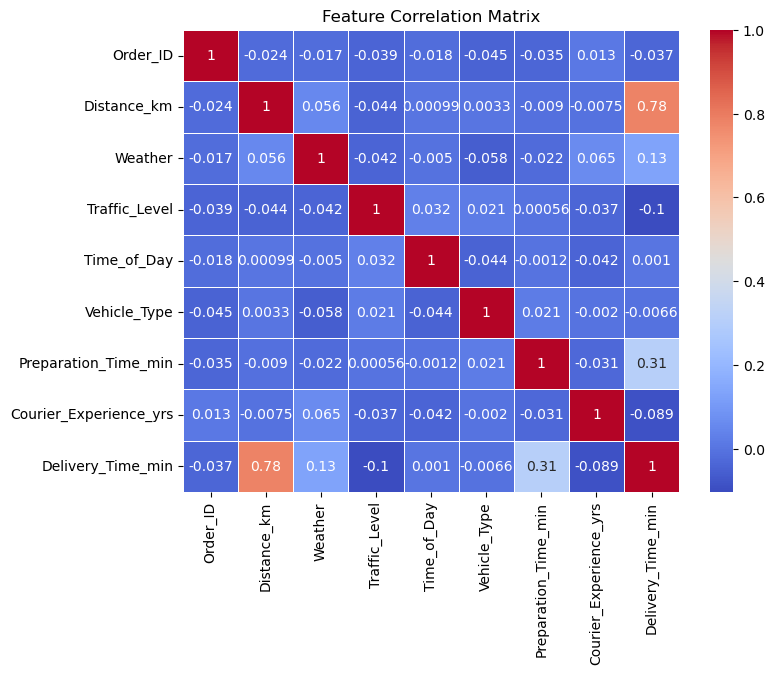

In [31]:
# 4. Exploratory Data Analysis (EDA)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [38]:
# 5. Splitting Data into Train & Test Sets
X = df.drop(columns=["Delivery_Time_min"])  
y = df["Delivery_Time_min"]

In [39]:
X

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs
0,522,7.93,4,1,0,2,12,1.0
1,738,16.42,0,2,1,0,20,2.0
2,741,9.52,1,1,3,2,28,1.0
3,661,7.44,2,2,0,2,5,1.0
4,412,19.03,0,1,2,0,16,5.0
...,...,...,...,...,...,...,...,...
995,107,8.50,0,0,1,1,13,3.0
996,271,16.28,2,1,2,2,8,9.0
997,861,15.62,3,0,1,2,26,2.0
998,436,14.17,0,1,0,0,8,0.0


In [40]:
y

0      43
1      84
2      59
3      37
4      68
       ..
995    54
996    71
997    81
998    55
999    58
Name: Delivery_Time_min, Length: 1000, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# 6. Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# 7. Model Evaluation
y_pred = model.predict(X_test)

In [44]:
y_pred

array([40.08192631, 64.32006881, 38.26635796, 41.95765687, 85.91708411,
       35.19822845, 63.34032104, 35.71573438, 29.70815376, 70.5613159 ,
       70.03905068, 65.34796021, 31.01136155, 69.21961886, 88.14203736,
       92.51932826, 30.18485257, 67.80664901, 44.28484124, 58.41269855,
       81.82201079, 26.59156163, 78.11136476, 74.11902689, 56.77422476,
       30.85652319, 80.59657682, 23.32455405, 47.67870234, 62.4916217 ,
       61.66517238, 23.53823945, 62.25338962, 41.48539989, 74.01090882,
       17.9548092 , 68.94027919, 52.99103397, 46.03976672, 72.56086708,
       73.86602692, 37.62170988, 76.57242687, 64.82168161, 36.96584405,
       21.17615811, 91.07308829, 89.04097586, 82.66969938, 32.21528284,
       58.13363866, 62.76917213, 43.57729221, 74.1730588 , 51.28301539,
       52.76338164, 69.72807678, 75.15360089, 63.54395047, 87.29489206,
       49.90324352, 45.4714115 , 42.75525026, 52.68708715, 48.65615244,
       66.02874107, 68.36192337, 88.47557692, 68.89852336, 53.56

In [45]:
print("\nModel Performance Metrics:")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f} minutes")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f} minutes")


Model Performance Metrics:
R² Score: 0.76
Mean Absolute Error (MAE): 7.28 minutes
Mean Squared Error (MSE): 109.24
Root Mean Squared Error (RMSE): 10.45 minutes


In [48]:
# Get the correct number of columns
sample_values = [15, 3.5, 2, 1, 1, 0, 5, 1]  
sample_order = pd.DataFrame([sample_values], columns=X.columns)

In [49]:
# Predict delivery time
predicted_time = model.predict(sample_order)
print(f"\nPredicted Delivery Time: {predicted_time[0]:.2f} minutes")


Predicted Delivery Time: 29.96 minutes


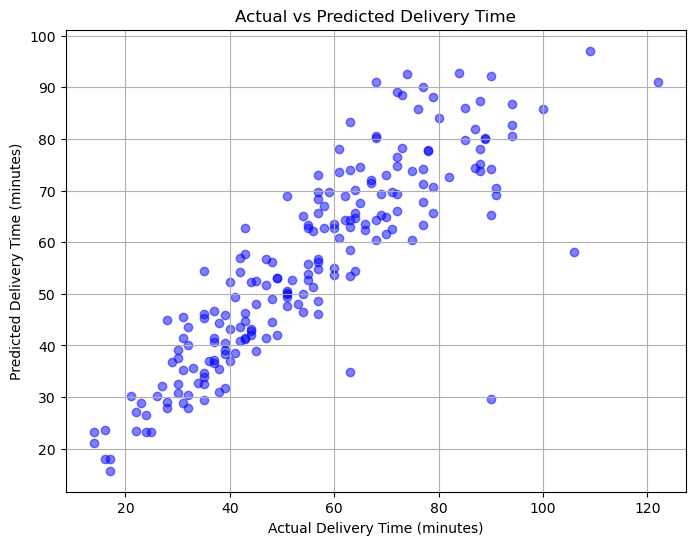

In [51]:
# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Delivery Time (minutes)")
plt.ylabel("Predicted Delivery Time (minutes)")
plt.title("Actual vs Predicted Delivery Time")
plt.grid(True)
plt.show()